## Predict Sonic log (DT) from other Wire line logs with scikit-learn
Saleh Z. AL-ATWAH

Dhahran Saudi Arabia


### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns

### Quick look to the data

We start by importing well log data in a pandas frame (please take in consideration that the well data was converted from .LAS file into .csv file


In [95]:
logs0 = pd.read_csv('W1 Well Logs_11.csv')

print (logs0.columns)
print (logs0.head(11))
print(logs0.dtypes)

Index(['DEPTH', 'SP', 'GR', 'CALI', 'ILM', 'ILD', 'RHOB', 'NPHI', 'DT'], dtype='object')
     DEPTH       SP        GR    CALI     ILM     ILD    RHOB     NPHI  \
0   2960.0 -0.83346  105.5980  8.6651  6.2611  6.9714  2.2590  38.7666   
1   2960.5 -0.75471  105.3558  8.6521  6.3126  7.0705  2.2466  37.8857   
2   2961.0 -0.08277  104.5651  8.6651  6.3530  7.1711  2.2233  38.9745   
3   2961.5  0.03898  103.5408  8.6620  6.3937  7.2709  2.2609  40.5018   
4   2962.0 -0.26628  103.6226  8.6708  6.4346  7.3689  2.2383  41.2153   
5   2962.5 -0.42123  104.6367  8.6810  6.4758  7.4683  2.2269  40.3333   
6   2963.0 -0.45668  105.7272  8.6643  6.5172  7.4690  2.2508  39.0473   
7   2963.5 -0.50854  106.6014  8.6650  6.5589  7.4661  2.2599  39.1259   
8   2964.0 -0.58869  107.3476  8.6630  6.5223  7.4633  2.2454  39.9564   
9   2964.5 -0.70995  107.3400  8.6607  6.3832  7.4019  2.2552  40.5802   
10  2965.0 -0.65110  107.1088  8.6633  6.2471  7.2940  2.2575  40.5518   

         DT  
0   92.5

In [96]:
print (logs0.shape) # checking number of rows and columns

(761, 9)


Let's have a quick look at the target DT sonic log versus depth

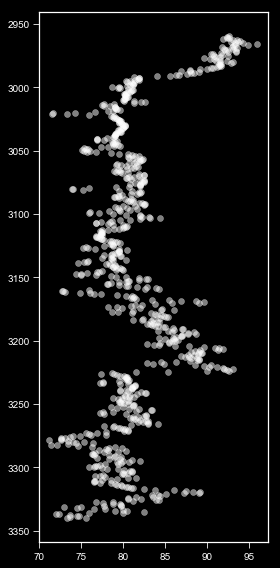

In [98]:
fig = plt.figure(figsize=(4,8))
ax1 = fig.add_subplot(111)
plt.style.use(['dark_background'])
ax1.scatter(logs0["DT"], logs0["DEPTH"], color = 'w', alpha=0.5)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

There's one bad value at mid max depth that we need to eliminate (it's the lowest value of DT).

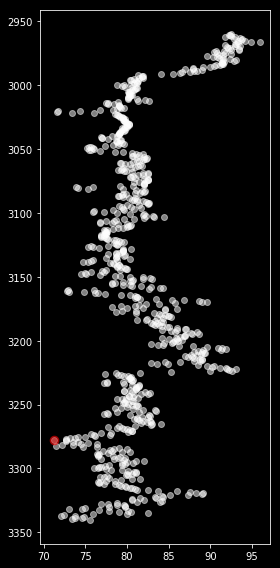

In [5]:
fig = plt.figure(figsize=(4,8))
ax1 = fig.add_subplot(111)

plt.style.use(['dark_background'])
ax1.scatter(logs0["DT"], logs0["DEPTH"], color = 'w', alpha=0.5)
templogs = logs0[(logs0["DT"]==logs0["DT"].min())]
ax1.scatter(templogs["DT"], templogs["DEPTH"], s=75, color = 'r', alpha=0.5)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Now we can remove the data point, then plot again.

In [6]:
logs0 = logs0[~(logs0["DT"]==logs0["DT"].min())]

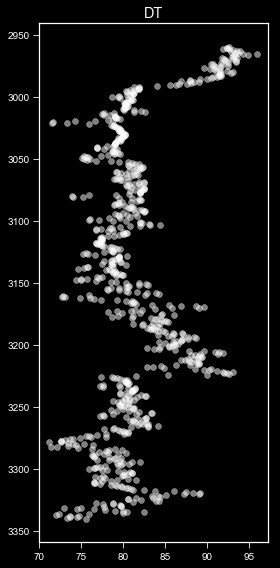

In [100]:
fig = plt.figure(figsize=(4,8))
ax1 = fig.add_subplot(111)

plt.style.use(['dark_background'])
plt.title('DT')
ax1.scatter(logs0["DT"], logs0["DEPTH"], color = 'w', alpha=0.5)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

#### Smoothing logs

smoothing logs is needed prior to training

In [99]:
lst = list(logs0)
logs = logs0.copy(deep=True)
window = 17
for i in lst:
    logs[i] = pd.Series(logs[i]).rolling(window=window, min_periods=1).mean()

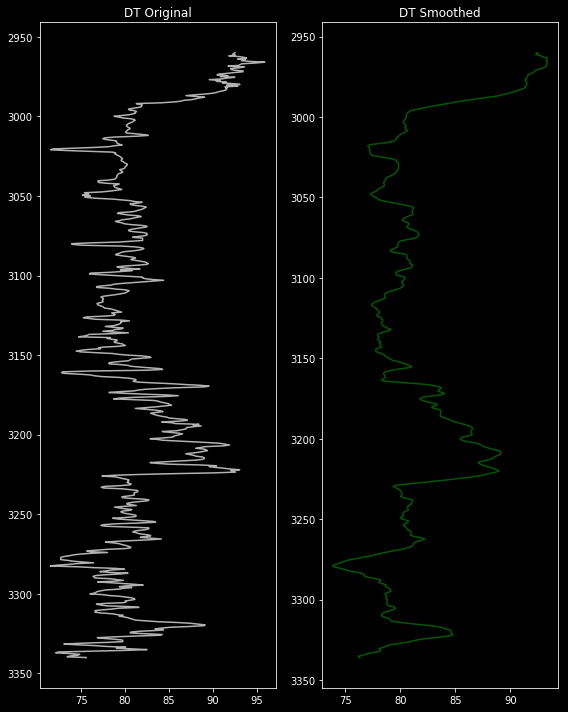

In [9]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(121)
plt.title('DT Original')
plt.style.use(['dark_background'])
ax1.plot( logs0["DT"], logs0["DEPTH"],'w', alpha=0.7)
plt.gca().invert_yaxis()
ax2 = fig.add_subplot(122)
plt.title('DT Smoothed')
ax2.plot( logs["DT"], logs["DEPTH"],'green', alpha=0.7)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

### CHECK SCATTER MATRIX AND CORRELATION COEFFICIENTS

plotting scatter matrix with the paired with scatter plots and histogram distribution 

This will assist in learning the data, and answer different questions, such as:
- what are the type of distributions? (normal, exponential, etc.)?
- is there any linear relation ships between different type of logs and DT?


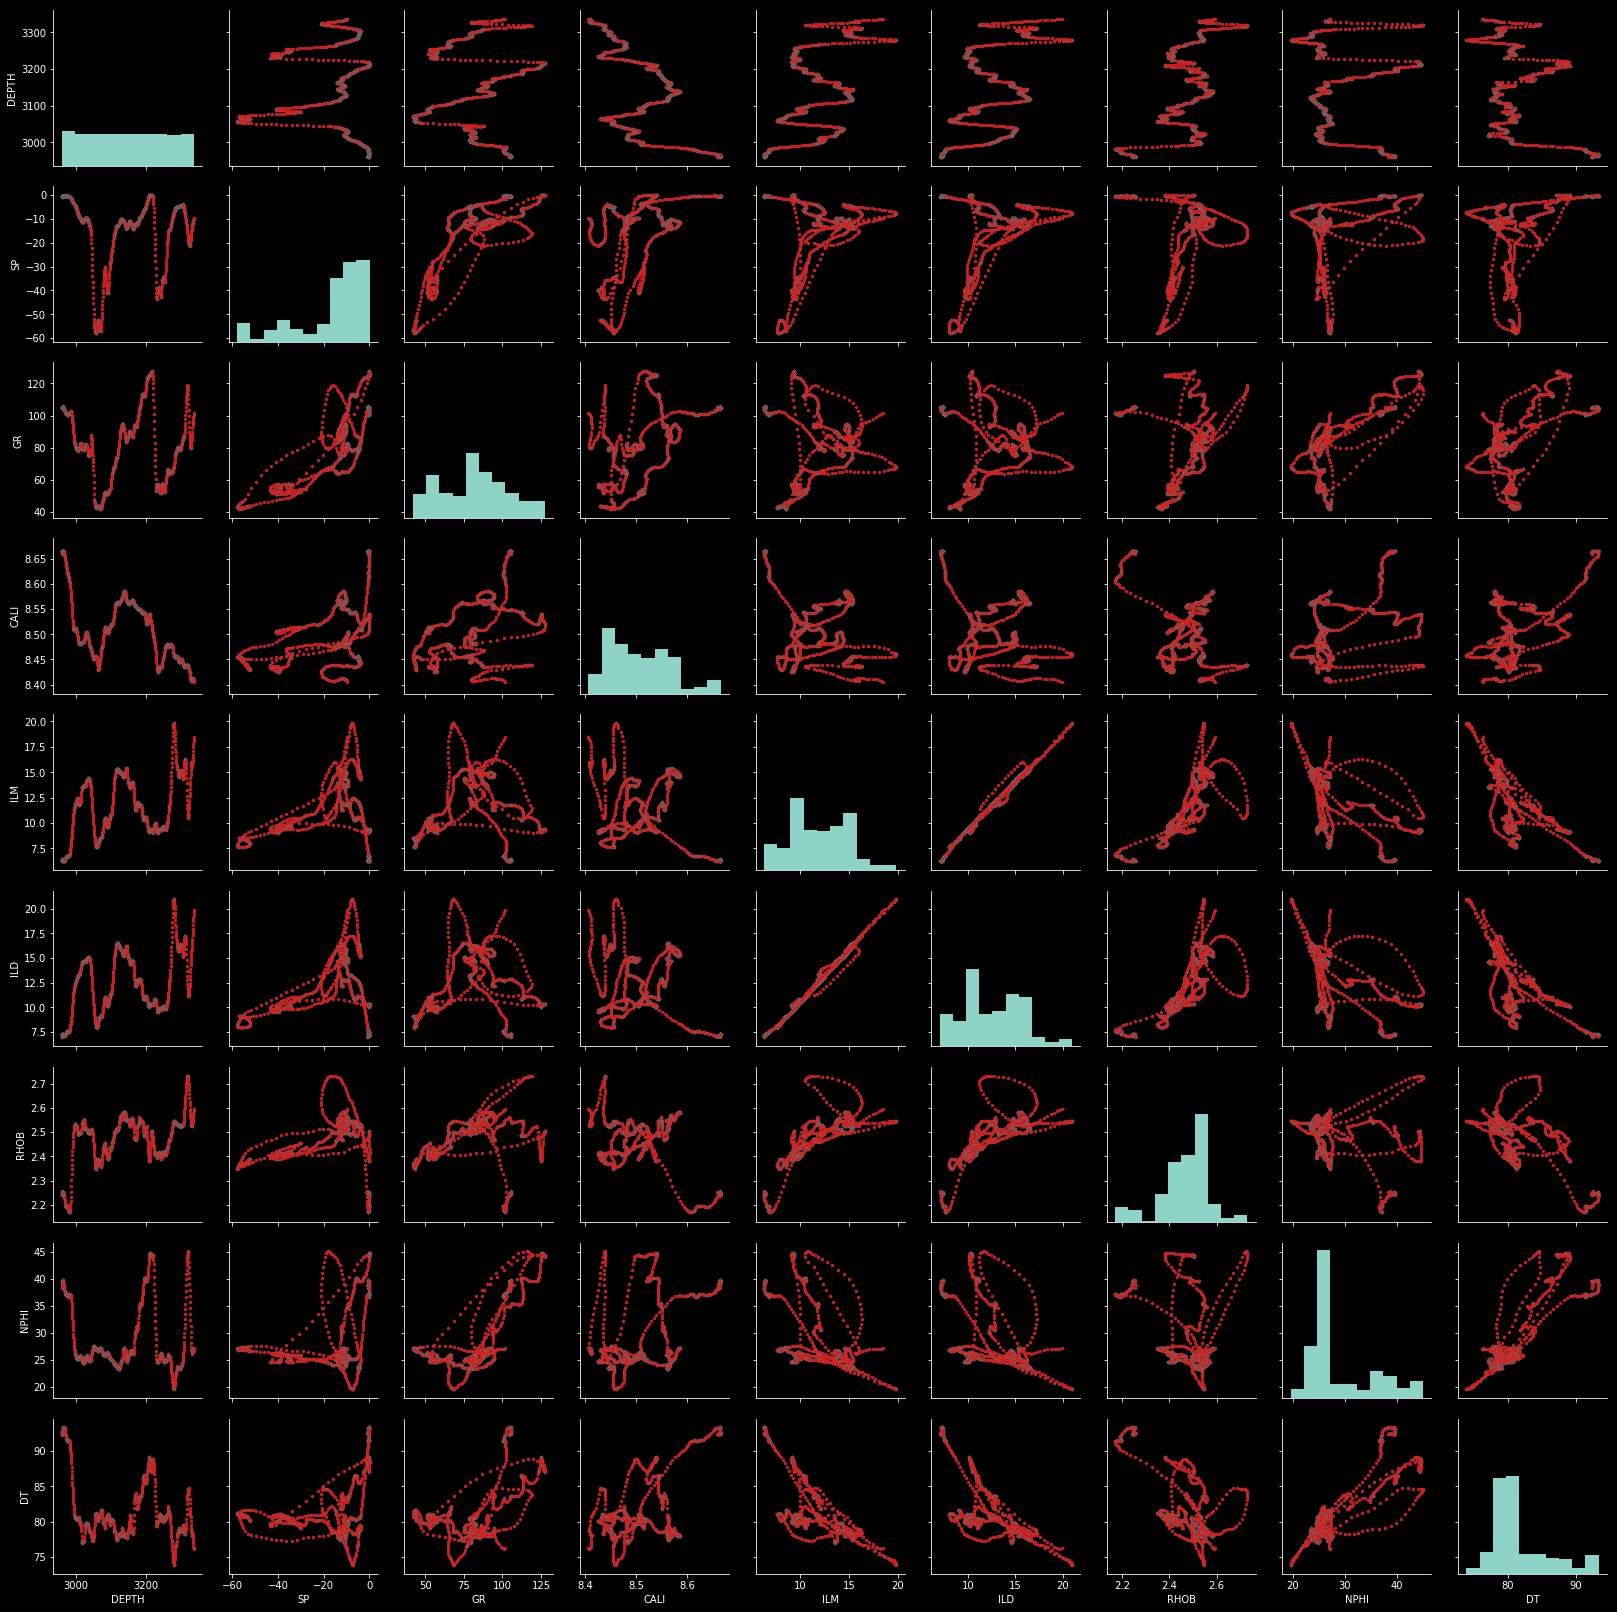

In [10]:
g = sns.PairGrid(logs)
g.map_diag(plt.hist)
plt.style.use(['dark_background'])
g.map_offdiag(plt.scatter, s=10, color = "r", edgecolor="c", linewidth= 0.2);

looking at the scatter plot , most of them can be fitted with different type of functions. therefore, DT has a high chance to be predicted correctly

We can print the (Pearson) correlation coefficients as a matrix.

In [11]:
np.set_printoptions(precision=2)
pc= logs.corr().as_matrix()
print(pc)

[[ 1.    0.    0.06 -0.55  0.44  0.42  0.53 -0.02 -0.31]
 [ 0.    1.    0.81  0.48  0.3   0.33  0.15  0.36  0.33]
 [ 0.06  0.81  1.    0.47  0.02  0.05  0.14  0.75  0.55]
 [-0.55  0.48  0.47  1.   -0.28 -0.25 -0.41  0.35  0.57]
 [ 0.44  0.3   0.02 -0.28  1.    1.    0.78 -0.52 -0.76]
 [ 0.42  0.33  0.05 -0.25  1.    1.    0.77 -0.51 -0.74]
 [ 0.53  0.15  0.14 -0.41  0.78  0.77  1.   -0.21 -0.65]
 [-0.02  0.36  0.75  0.35 -0.52 -0.51 -0.21  1.    0.84]
 [-0.31  0.33  0.55  0.57 -0.76 -0.74 -0.65  0.84  1.  ]]


d:\Users\Salehs\Anaconda33\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Load the array into a data frame

In [12]:
pcdf = pd.DataFrame(pc, index=list(logs.columns), 
                    columns=list(logs.columns))
pcdf

,DEPTH,SP,GR,CALI,ILM,ILD,RHOB,NPHI,DT
DEPTH,1.000000,0.004871,0.057243,-0.551851,0.438759,0.421051,0.525311,-0.018144,-0.312192
SP,0.004871,1.000000,0.811481,0.478823,0.297660,0.334552,0.152205,0.356050,0.325425
GR,0.057243,0.811481,1.000000,0.466604,0.017017,0.047589,0.144097,0.747154,0.552134
CALI,-0.551851,0.478823,0.466604,1.000000,-0.280956,-0.250268,-0.407181,0.345773,0.573827
ILM,0.438759,0.297660,0.017017,-0.280956,1.000000,0.995517,0.779789,-0.521379,-0.758368
ILD,0.421051,0.334552,0.047589,-0.250268,0.995517,1.000000,0.765428,-0.506013,-0.736522
RHOB,0.525311,0.152205,0.144097,-0.407181,0.779789,0.765428,1.000000,-0.213689,-0.647926
NPHI,-0.018144,0.356050,0.747154,0.345773,-0.521379,-0.506013,-0.213689,1.000000,0.838584
DT,-0.312192,0.325425,0.552134,0.573827,-0.758368,-0.736522,-0.647926,0.838584,1.000000


Due to the fact that teh data is Skewed and has outliers and some non linear realation ship , a spearman correlation coefficients must be calculated.

In [13]:
np.set_printoptions(precision=2)
pcs= logs.corr(method='spearman').as_matrix()
print(pcs)

[[ 1.   -0.12  0.03 -0.53  0.4   0.4   0.43 -0.11 -0.2 ]
 [-0.12  1.    0.76  0.43  0.08  0.13  0.14  0.27  0.27]
 [ 0.03  0.76  1.    0.48  0.02  0.06  0.29  0.62  0.4 ]
 [-0.53  0.43  0.48  1.   -0.12 -0.1  -0.08  0.23  0.28]
 [ 0.4   0.08  0.02 -0.12  1.    0.99  0.84 -0.56 -0.78]
 [ 0.4   0.13  0.06 -0.1   0.99  1.    0.84 -0.55 -0.77]
 [ 0.43  0.14  0.29 -0.08  0.84  0.84  1.   -0.22 -0.56]
 [-0.11  0.27  0.62  0.23 -0.56 -0.55 -0.22  1.    0.76]
 [-0.2   0.27  0.4   0.28 -0.78 -0.77 -0.56  0.76  1.  ]]


d:\Users\Salehs\Anaconda33\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [14]:
pcsdf = pd.DataFrame(pcs, index=list(logs.columns), 
                    columns=list(logs.columns))
pcsdf

,DEPTH,SP,GR,CALI,ILM,ILD,RHOB,NPHI,DT
DEPTH,1.000000,-0.119549,0.031675,-0.530163,0.404741,0.395794,0.429621,-0.114960,-0.199791
SP,-0.119549,1.000000,0.764843,0.433358,0.082147,0.129263,0.140172,0.273842,0.273345
GR,0.031675,0.764843,1.000000,0.481906,0.024786,0.062313,0.294330,0.615625,0.403364
CALI,-0.530163,0.433358,0.481906,1.000000,-0.124901,-0.097691,-0.078188,0.233011,0.278515
ILM,0.404741,0.082147,0.024786,-0.124901,1.000000,0.993321,0.842201,-0.561131,-0.784233
ILD,0.395794,0.129263,0.062313,-0.097691,0.993321,1.000000,0.839827,-0.547304,-0.770976
RHOB,0.429621,0.140172,0.294330,-0.078188,0.842201,0.839827,1.000000,-0.223605,-0.561117
NPHI,-0.114960,0.273842,0.615625,0.233011,-0.561131,-0.547304,-0.223605,1.000000,0.762163
DT,-0.199791,0.273345,0.403364,0.278515,-0.784233,-0.770976,-0.561117,0.762163,1.000000


In [15]:
logs.describe()

,DEPTH,SP,GR,CALI,ILM,ILD,RHOB,NPHI,DT
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,3145.871053,-16.496040,81.518940,8.508038,11.762354,12.529580,2.469515,29.117401,81.564472
std,109.804984,15.249106,21.660677,0.060514,2.971917,3.101236,0.103751,6.319344,4.289060
min,2960.000000,-57.881583,41.805000,8.406224,6.258288,6.971400,2.169971,19.607988,73.861000
25%,3050.875000,-21.134094,64.863866,8.455857,9.428197,10.156684,2.413694,24.948921,78.638753
50%,3145.750000,-11.405829,81.331850,8.502788,11.695465,12.364465,2.495935,26.219376,80.287516
75%,3240.625000,-5.559144,96.430860,8.552601,14.310896,15.016359,2.534004,33.402885,83.303532
max,3336.000000,0.057925,127.672382,8.666017,19.827253,20.971682,2.730988,45.059059,93.369335


###  LINEAR CORRELATION IN SCIKIT-LEARN

Now i will attempt to predict DT using th other logs and Depth is included as sediment compaction affects DT

The goal here is to train the linear predictor on a subset of the Sonic data that is different from the one we will make predictions on, which will allows us to avoid overfitting. Using cross validation, a process of splitting the data into several  folds. By spliting the logs in five folds of the same size. In the first run, the first four parts are compined, train the predictor, then make predictions on the fifth part, and measure accuracy. In the second run, a combnation of first, third, fourth and fifth, train the predictor, make predictions on the second part, measure accuracy again and so on.

In [16]:
# iterate over possible number of cross validation folds to check scores and decide optimal fold 
from sklearn.model_selection import cross_val_score

# Import the linear regression class
from sklearn.linear_model import LinearRegression

# The columns we'll use to predict the target
predictors = ['DEPTH', 'GR', 'NPHI', 'RHOB']

# Initialize our algorithm class
alg = LinearRegression()

scores = []
for i in np.arange(2, 15, 1):
    score = cross_val_score(alg, logs[predictors], logs["DT"], cv=i)
    scores.append(np.mean(score))
    # Take the mean of the scores (because we have one for each fold)

print (scores)

[0.8741099464467429, 0.9251609907156947, 0.7010679477459705, 0.3964267904471203, 0.6283462627201898, 0.5800257521402054, 0.2868715720881398, 0.5738589424526294, 0.3757040360524185, 0.048932789169591366, 0.022794738529902336, 0.1653709918090415, -0.02995154972827036]


##### The scores above are considered low 


Now using optimal number of folds, we will use 3 fodls to cross validate our prediction

In [17]:
from sklearn.model_selection import KFold


kf = KFold(n_splits=6, random_state=1)


predictions = []
for train, test in kf.split(logs):
    # The predictors we're using the train the algorithm.
    train_predictors = (logs[predictors].iloc[train,:])
    # The target we're using to train the algorithm.
    train_target = logs["DT"].iloc[train]
    # Training the algorithm using the predictors and target.
    alg.fit(train_predictors, train_target)
    # We can now make predictions on the test fold
    test_predictions = alg.predict(logs[predictors].iloc[test,:])
    predictions.append(test_predictions)
    score = np.mean(cross_val_score(alg, logs[predictors], logs["DT"], cv=6))
print (score)

0.6283462627201898



To explain the low score value , i will be showing one of the splits of DT values in the training test and testing set.

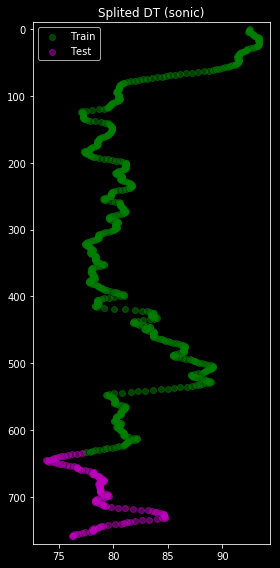

In [18]:
fig = plt.figure(figsize=(4,8))
ax1 = fig.add_subplot(111)
plt.style.use(['dark_background'])
plt.title('Splited DT (sonic)')
ax1.scatter(logs["DT"].iloc[train], np.arange(train.shape[0]), color = 'g', alpha=0.5, label='Train')
ax1.scatter(logs["DT"].iloc[test], np.arange(test.min(),test.max()+1,1), color = 'm', alpha=0.5, label='Test')

ax1.set_ylim([-10, logs.shape[0] + 10])
plt.tight_layout()
plt.gca().invert_yaxis()
ax1.legend()
plt.show()

In [19]:
idx = np.array(logs.index) # get the index column in the original DataFrame
print (idx[:10])

logs["idx"] = idx # add the index and the predictions as columns to the logs DataFrame

print (list(logs)) # check new columns are in

import random # Set a random seed to make the shuffle deterministic and repeatable 
np.random.seed(1)
random.seed(1)

logs1 = logs.loc[np.random.permutation(logs.idx)] # shuffle

print (logs1.head(5)) # checking shuffle with index column

[0 1 2 3 4 5 6 7 8 9]
['DEPTH', 'SP', 'GR', 'CALI', 'ILM', 'ILD', 'RHOB', 'NPHI', 'DT', 'idx']
      DEPTH         SP         GR      CALI        ILM        ILD      RHOB  \
623  3267.5 -14.307755  64.253341  8.477594  12.046606  12.958453  2.465800   
101  3006.5  -7.908822  78.266529  8.489706  12.300424  13.224453  2.492312   
747  3329.5 -14.514466  84.618635  8.408982  15.925835  15.920382  2.524012   
194  3053.0 -55.352586  47.014412  8.450841   8.748859   9.217812  2.400253   
735  3323.5 -21.183906  87.867159  8.425218  12.615718  12.148453  2.624094   

          NPHI         DT  idx  
623  25.445959  80.840771  623  
101  25.116635  80.422529  101  
747  26.527953  78.552065  747  
194  27.367112  79.109188  194  
735  37.971418  83.281118  735  


Lets run a cross validation scores again.

In [20]:
kf = KFold(n_splits=6, random_state=1)
predictions = []
for train, test in kf.split(logs):
    # The predictors we're using the train the algorithm. Note how we only take the rows in the train folds.
    train_predictors = (logs1[predictors].iloc[train,:])
    # The target we're using to train the algorithm.
    train_target = logs1["DT"].iloc[train]
    # Training the algorithm using the predictors and target.
    alg.fit(train_predictors, train_target)
    # We can now make predictions on the test fold
    test_predictions = alg.predict(logs1[predictors].iloc[test,:])
    predictions.append(test_predictions)
    score = np.mean(cross_val_score(alg, logs1[predictors], logs1["DT"], cv=6))
print (score)

0.9484553928755629


Showing another split to show the progression

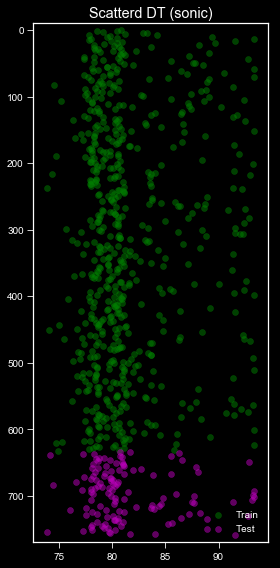

In [101]:
fig = plt.figure(figsize=(4,8))
ax1 = fig.add_subplot(111)
plt.style.use(['dark_background'])
plt.title('Scatterd DT (sonic)')
ax1.scatter(logs1["DT"].iloc[train], np.arange(train.shape[0]), color = 'g', alpha=0.5, label='Train')
ax1.scatter(logs1["DT"].iloc[test], np.arange(test.min(),test.max()+1,1), color = 'm', alpha=0.5 , label='Test')

ax1.set_ylim([-10, logs1.shape[0] + 10])
plt.tight_layout()
plt.gca().invert_yaxis()
ax1.legend()
plt.show()

### EVALUATING DT PREDICTION 

In order to evaulate our prediction , a base line needs to be established. in this case we will be using the sonic log mean as a base line and thats due to the fact that sonic in average increases with depth due to compaction . 

In [22]:
baseline = np.full(logs1["DT"].shape, logs1["DT"].mean()) # create baseline model.
print (baseline.shape)
print (baseline [:5])

(760,)
[81.56 81.56 81.56 81.56 81.56]


Baseline model consisting of cvalues equal to the mean at each sample. The diagonal line represent perfect prediction.

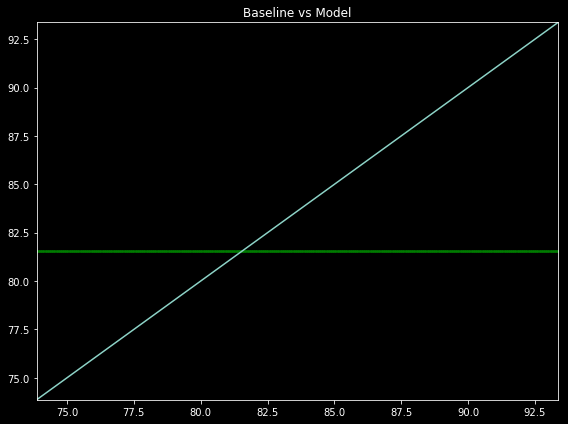

In [23]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
plt.style.use(['dark_background'])
plt.title('Baseline vs Model')
ax1.scatter(np.linspace(logs1["DT"].min(), logs1["DT"].max(), logs1["DT"].shape[0]), 
            baseline, s=3, color = 'g', alpha=0.5)

ax1.plot(np.linspace(logs1["DT"].min(), logs1["DT"].max(), logs1["DT"].shape[0]), 
         np.linspace(logs1["DT"].min(), logs1["DT"].max(), logs1["DT"].shape[0]))

ax1.set_xlim([logs1["DT"].min(), logs1["DT"].max()  ])
ax1.set_ylim([logs1["DT"].min(), logs1["DT"].max() ])

plt.tight_layout()
plt.show()

Compare the result of the linear prediction agains the perfect prediction in the diagonal line.

In [24]:
prediction = np.concatenate(predictions, axis=0)
# The predictions are in three separate numpy arrays, so we need to concatenate them into one.  

In [25]:
print(prediction.shape)
print(logs1["DT"].shape)

(760,)
(760,)


Plot of predicted versus actual, linear model. Diagonal line is perfect prediction.

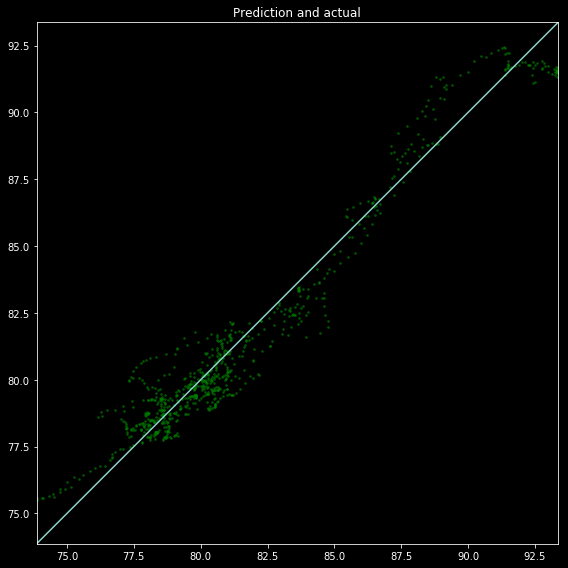

In [26]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
plt.style.use(['dark_background'])

ax1.scatter(logs1["DT"], prediction, s=3, color = 'g', alpha=0.5)
plt.title('Prediction and actual')
ax1.plot(np.linspace(logs1["DT"].min(), logs1["DT"].max(), logs1["DT"].shape[0]), 
         np.linspace(logs1["DT"].min(), logs1["DT"].max(), logs1["DT"].shape[0]))

ax1.set_xlim([logs1["DT"].min() , logs1["DT"].max()  ])
ax1.set_ylim([logs1["DT"].min() , logs1["DT"].max() ])


plt.tight_layout()
plt.show()

lets now compare prediction to reality

In [27]:
logs1["predictedDT"] = prediction # adding the prediction so it is in the final DataFrame
logs2 = logs1.sort_values(by ='DEPTH', ascending=[True])
logs2.drop('idx', axis=1, inplace=True)

Original versus predicted sonic, as scatter plots.

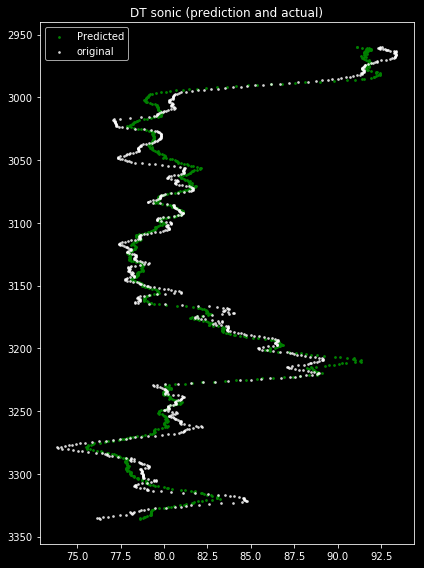

In [28]:
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(111)
plt.style.use(['dark_background'])
plt.title('DT sonic (prediction and actual)')
ax1.scatter(logs2["predictedDT"], logs2["DEPTH"], s = 3, color = 'green', label='Predicted')
ax1.scatter(logs2["DT"], logs2["DEPTH"], s = 3, color = 'white', alpha = 0.7, label='original')
ax1.legend()
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

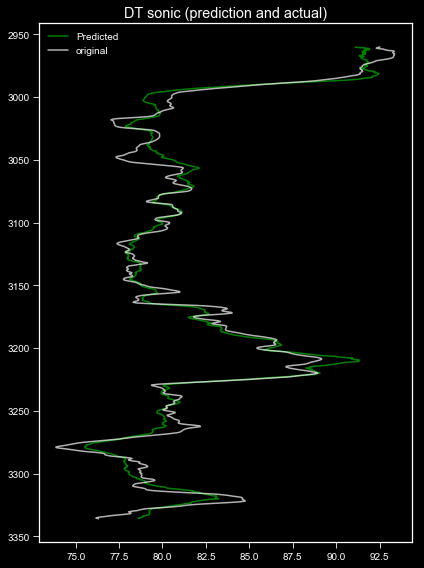

In [102]:
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(111)
plt.style.use(['dark_background'])
plt.title('DT sonic (prediction and actual)')
ax1.plot( logs2["predictedDT"], logs2["DEPTH"],'green',label='Predicted')
ax1.plot( logs2["DT"], logs2["DEPTH"],'white', alpha=0.7,label='original')
plt.tight_layout()
ax1.legend()
plt.gca().invert_yaxis()
plt.show()

### Addition investigation Opportunities

- expirimint with diffrent base line models
- Try other algorithims to preform prediction such as Random Forest or SVM


###  Flagging Errors in Prediction

#### Calculate error, error mean, standard deviation of error



In [30]:
err = np.abs(logs2["predictedDT"]-logs2["DT"])
err_mean = np.mean(err)
err_std = np.std(err)

print("Error Mean : ",err_mean,"    Error STD : ", err_std)

Error Mean :  0.7519209135230751     Error STD :  0.612274385427009


#### Calculate sign of slopes



In [31]:
pred_s = np.sign(logs2["predictedDT"].diff().fillna(logs2["predictedDT"]))
actual_s = np.sign(logs2["DT"].diff().fillna(logs2["DT"]))

#### Flagging Methods

1st Method : The difference between the predicted and actual is larger than the mean difference then add one standard of devation

2nd Method : if it's negative

3rd Method : if it's larger than mean + one standard of devation

In [32]:
def error_flag(pred, actual, dev = 1.0, method = 1):

    flag = np.zeros(len(pred))
    err = np.abs(pred-actual)
    err_mean = np.mean(err)
    err_std = np.std(err)
    ss = np.sign(pred.diff().fillna(pred))
    ls = np.sign(actual.diff().fillna(actual))

    if method == 1:
        flag[np.where(err>(err_mean + (dev*err_std)))] = 1
    elif method == 2:      
        flag[np.where((ss + ls)==0 )]= 1
    elif method == 3:
        flag[np.where(np.logical_or(err>(err_mean + (dev*err_std)), (ss+ls)==0 ))]= 1
    return flag


In [33]:
flag = error_flag(logs2["predictedDT"], logs2["DT"], 1,  1)

In [34]:
from matplotlib  import gridspec

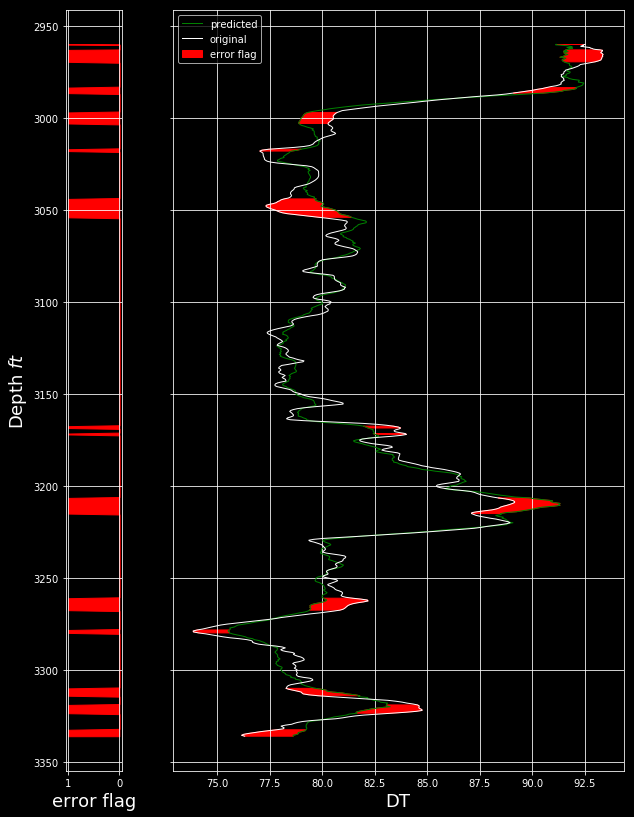

In [35]:
fig = plt.figure(figsize=(10,14))
gs = gridspec.GridSpec(1, 2, width_ratios=[0.5, 4]) 
plt.style.use(['dark_background'])

ax = plt.subplot(gs[0])
ax.set_ylabel(r'Depth $ft$', size=18)
ax.fill_betweenx(logs2['DEPTH'], flag, 0, color = 'r')
ax.invert_yaxis()
ax.invert_xaxis()
ax.set_xlabel('error flag', size=18)

ax.grid()

ax1 = plt.subplot(gs[1])
ax1.plot(logs2["predictedDT"], logs2["DEPTH"], 'Green', label='predicted', linewidth = 1)
ax1.plot(logs2["DT"], logs2["DEPTH"], 'White', label='original', linewidth = 1)
ax1.fill_betweenx(logs2['DEPTH'], logs2["predictedDT"], logs2["DT"], where=flag==1, color = 'r', label='error flag')

# Do some plot annotations
#ax1.set_title('title here')
ax1.invert_yaxis()
ax1.set_yticklabels([])
ax1.set_xlabel('DT', size=18)

ax1.legend()
    
ax1.grid()
#fig.savefig('file.png', dpi=250, bbox_inches='tight', pad_inches=0.2)
plt.show()


In [37]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [49]:
usa = gpd.read_file('./states.shp')


In [53]:
usa

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,(POLYGON ((-160.0738033454681 22.0041773479577...
1,Washington,2,53,Pacific,WA,(POLYGON ((-122.4020153103835 48.2252163723779...
2,Montana,3,30,Mountain,MT,POLYGON ((-111.4754253002074 44.70216236909688...
3,Maine,4,23,New England,ME,(POLYGON ((-69.77727626137293 44.0741483685119...
4,North Dakota,5,38,West North Central,ND,POLYGON ((-98.73043728833767 45.93827137024809...
5,South Dakota,6,46,West North Central,SD,POLYGON ((-102.7883842921169 42.99530336750724...
6,Wyoming,7,56,Mountain,WY,POLYGON ((-104.0536152932953 41.69821836629923...
7,Wisconsin,8,55,East North Central,WI,(POLYGON ((-87.74855527810999 44.9616163693385...
8,Idaho,9,16,Mountain,ID,"POLYGON ((-117.026295305377 43.67903136814401,..."
9,Vermont,10,50,New England,VT,POLYGON ((-73.25806026461467 42.74605836727511...


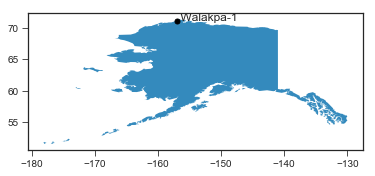

In [94]:
plt.style.use(['seaborn-ticks'])
x, y = (-157.059960, 71.139193)
usa[usa.STATE_ABBR == 'AK'].plot()
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Walakpa-1', fontsize=12);


In [84]:
import sys
!{sys.executable} -m pip install contextily 

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Using cached https://files.pythonhosted.org/packages/46/ee/f9b4bfb55b6cf1b5562e0b16bc75ab2ca3810587753e4c9944279d75540c/rasterio-1.0.23.tar.gz
    Complete output from command python setup.py egg_info:
    INFO:root:Building on Windows requires extra options to setup.py to locate needed GDAL files. More information is available in the README.
    ERROR: A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    
    ----------------------------------------


Command "python setup.py egg_info" failed with error code 1 in D:\TEMP\Saleh\AppData\Local\Temp\pip-install-971oz5mn\rasterio\
